<a href="https://colab.research.google.com/github/OmarMahin/Temperature_Dataset_Project/blob/master/Temperature_Data_Analyzing_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## <font color='green'>Data cleaning:


In [5]:
dataset = pd.read_csv("city_temperature.csv")
dataset.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [6]:
dataset.tail()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1048570,Middle East,Oman,NaN,Muscat,2,7,1999,-99.0
1048571,Middle East,Oman,NaN,Muscat,2,8,1999,-99.0
1048572,Middle East,Oman,NaN,Muscat,2,9,1999,-99.0
1048573,Middle East,Oman,NaN,Muscat,2,10,1999,-99.0
1048574,Middle East,Oman,NaN,Muscat,2,11,1999,-99.0


In [7]:
dataset.shape

(1048575, 8)

<font color='green'>Finding missing values and replacing values for better understanding.</font>

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Region          1048575 non-null  object 
 1   Country         1048575 non-null  object 
 2   State           0 non-null        float64
 3   City            1048575 non-null  object 
 4   Month           1048575 non-null  int64  
 5   Day             1048575 non-null  int64  
 6   Year            1048575 non-null  int64  
 7   AvgTemperature  1048575 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 64.0+ MB


In [9]:
dataset['Country'].describe()

count       1048575
unique           95
top       Australia
freq          46330
Name: Country, dtype: object

In [10]:
dataset['Region'].describe()

count     1048575
unique          5
top        Europe
freq       381990
Name: Region, dtype: object

In [11]:
dataset['City'].describe()

count     1048575
unique        121
top        Munich
freq        10028
Name: City, dtype: object

In [12]:
dataset.isnull()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,False,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False,False
2,False,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1048570,False,False,True,False,False,False,False,False
1048571,False,False,True,False,False,False,False,False
1048572,False,False,True,False,False,False,False,False
1048573,False,False,True,False,False,False,False,False


<font color='green'>Here we can see that the state column shows all missing values.So, we have to see what's wrong.</font>

In [13]:
dataset['State'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: State, dtype: float64

<font color='green'>Here we can see that all values in the state column is NaN.But we can call it a feature because here state represents if the temperature was recorded in a state or not.Because it wasnt recorded in a state the values are NaN.So,to make it more undastandable we can replace NaN with "No state found"</font>

In [14]:
dataset.replace(np.nan,str('No state found'),inplace = True)
dataset.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,No state found,Algiers,1,1,1995,64.2
1,Africa,Algeria,No state found,Algiers,1,2,1995,49.4
2,Africa,Algeria,No state found,Algiers,1,3,1995,48.8
3,Africa,Algeria,No state found,Algiers,1,4,1995,46.4
4,Africa,Algeria,No state found,Algiers,1,5,1995,47.9


<font color='green'>Replacing month's number with it's name for better understanding.</font>

In [15]:
for i in range(1,13):
    if (i == 1):
        dataset['Month'] = dataset['Month'].replace(i,'January')
    elif (i == 2):
        dataset['Month'] = dataset['Month'].replace(i,'February')
    elif (i == 3):
        dataset['Month'] = dataset['Month'].replace(i,'March')
    elif (i == 4):
        dataset['Month'] = dataset['Month'].replace(i,'April')
    elif (i == 5):
        dataset['Month'] = dataset['Month'].replace(i,'May')
    elif (i == 6):
        dataset['Month'] = dataset['Month'].replace(i,'June')
    elif (i == 7):
        dataset['Month'] = dataset['Month'].replace(i,'July')
    elif (i == 8):
        dataset['Month'] = dataset['Month'].replace(i,'Auguest')
    elif (i == 9):
        dataset['Month'] = dataset['Month'].replace(i,'September')
    elif (i == 10):
        dataset['Month'] = dataset['Month'].replace(i,'October')
    elif (i == 11):
        dataset['Month'] = dataset['Month'].replace(i,'November')
    elif (i == 12):
        dataset['Month'] = dataset['Month'].replace(i,'December')

dataset.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,No state found,Algiers,January,1,1995,64.2
1,Africa,Algeria,No state found,Algiers,January,2,1995,49.4
2,Africa,Algeria,No state found,Algiers,January,3,1995,48.8
3,Africa,Algeria,No state found,Algiers,January,4,1995,46.4
4,Africa,Algeria,No state found,Algiers,January,5,1995,47.9


<font color = 'green'>I have found that there are some values in 'Year' column which does not make sense.Like:</font>

In [16]:
dataset['Year'].min()

200

<font color='green'>200 doesn't make any sense.Probably it was supposed to be 2000.So have to replace this with 2000.There is also values like 201 which need to be replaced with 2001.</font>

In [17]:
dataset.replace(200,2000,inplace = True)
dataset.replace(201,2001,inplace = True)
dataset['Year'].min()

1995

<font color = 'green'>Looks good now.</font>

## <font color = 'green'>Data visualization:

<font color='green'>Separating all regions into its own dataframe for easy access and visualization.</font>

In [18]:
dataset['Region'].unique()

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East'], dtype=object)

<font color = 'green'>There are some temperatures which are -99F.So , we are adding all rows into the new dataframe except the the rows where the temperature is -99F.</font> 

In [19]:
africa = dataset.loc[dataset.Region.isin(['Africa'])]
africa_tem = africa.loc[:,['Region','City', 'Month','Day','Year','AvgTemperature']]
africa_tem = africa_tem[africa_tem['AvgTemperature'] != -99.0] 

asia = dataset.loc[dataset.Region.isin(['Asia'])]
asia_tem = asia.loc[:,['Region','City', 'Month','Day','Year','AvgTemperature']]
asia_tem  = asia_tem [asia_tem['AvgTemperature'] != -99.0] 

australia = dataset.loc[dataset.Region.isin(['Australia/South Pacific'])]
australia_tem = australia.loc[:,['Region','City', 'Month','Day','Year','AvgTemperature']]
australia_tem = australia_tem[australia_tem['AvgTemperature'] != -99.0] 

europe = dataset.loc[dataset.Region.isin(['Europe'])]
europe_tem = europe.loc[:,['Region','City', 'Month','Day','Year', 'AvgTemperature']]
europe_tem = europe_tem[europe_tem['AvgTemperature'] != -99.0] 

middle_east = dataset.loc[dataset.Region.isin(['Middle East'])]
middle_east_tem = middle_east.loc[:,['Region','City', 'Month','Day','Year','AvgTemperature']]
middle_east_tem = middle_east_tem [middle_east_tem ['AvgTemperature'] != -99.0] 


all_regions = [africa_tem,asia_tem,australia_tem,europe_tem,middle_east_tem]

<font color = 'green'>Visualizing the temperature in different regions.</font>

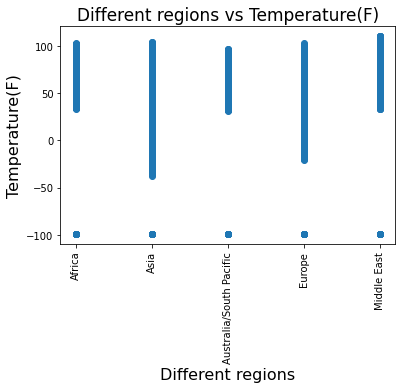

None


In [20]:
plt.scatter(dataset['Region'], dataset['AvgTemperature'])
plt.title('Different regions vs Temperature(F)', fontsize=17)
plt.xlabel('Different regions', fontsize=16)
plt.ylabel('Temperature(F)', fontsize=16)
plt.xticks(rotation=90)
print(plt.show())

<font color = 'green'>We can see which regions normally stay pretty wram and which regions contains areas which are very cold.</font>

<font color = 'green'>Temperature diffrence in diffrent cities of all regions.</font>

Africa


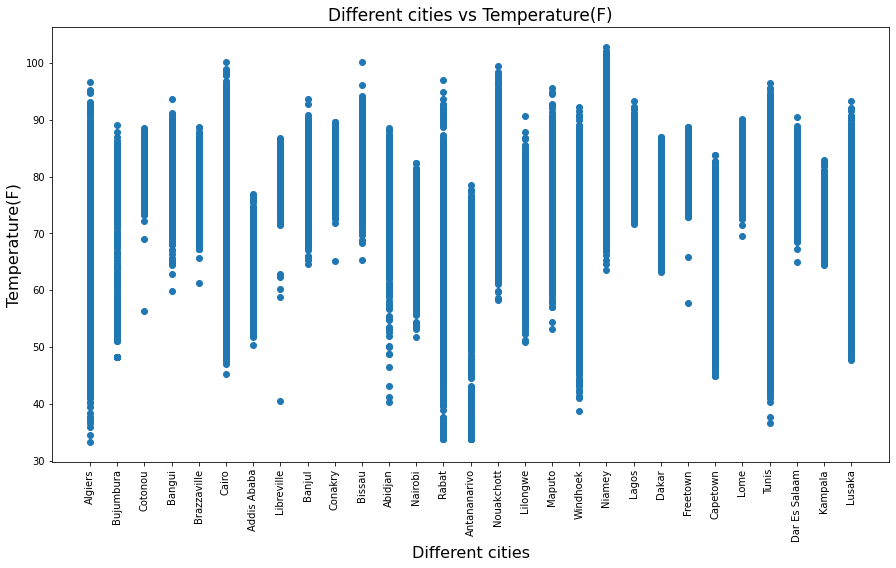

None
Asia


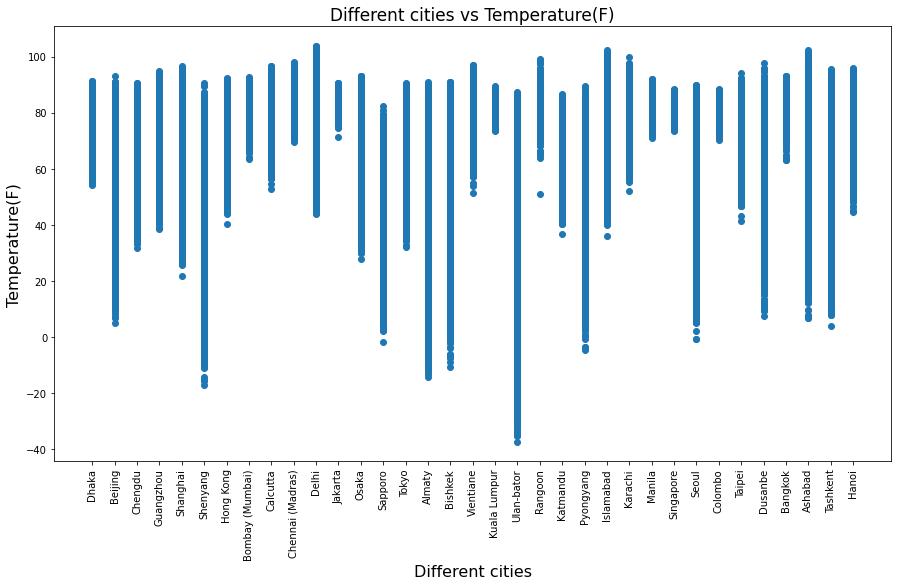

None
Austrailia


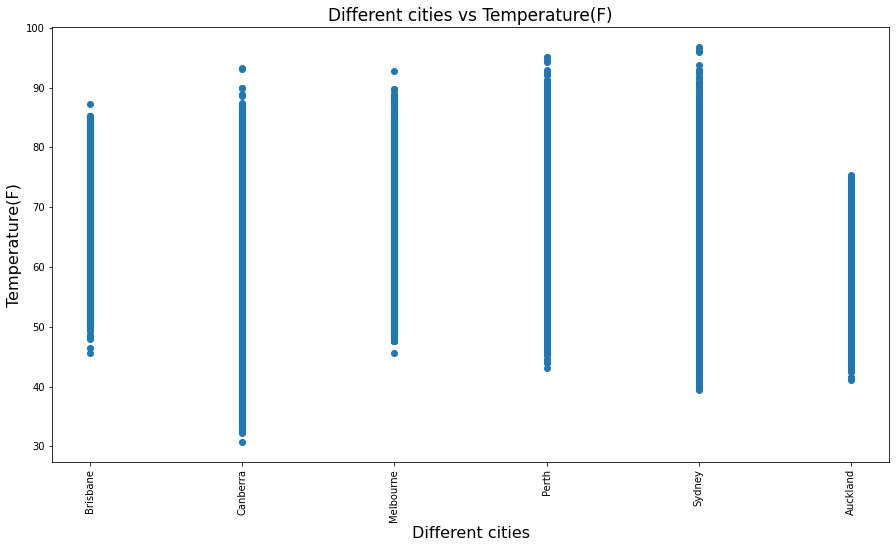

None
Europe


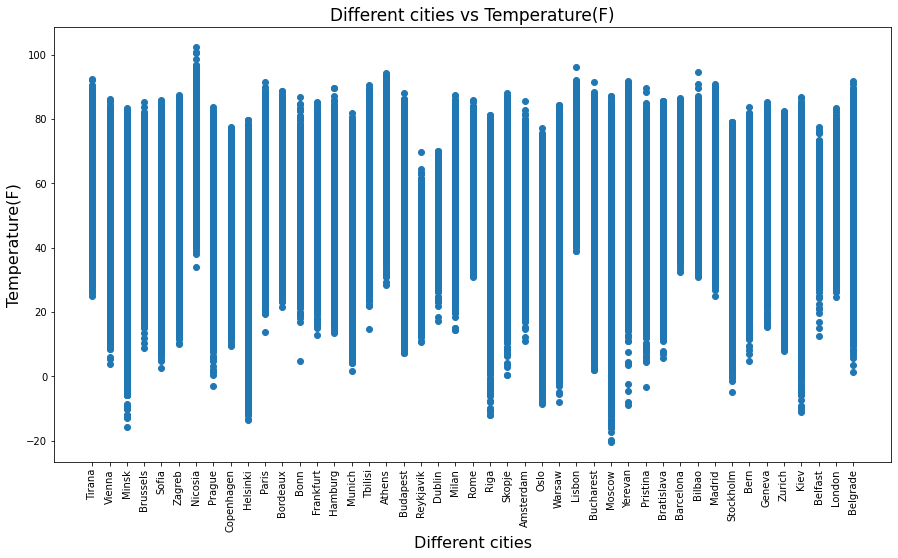

None
Middle East


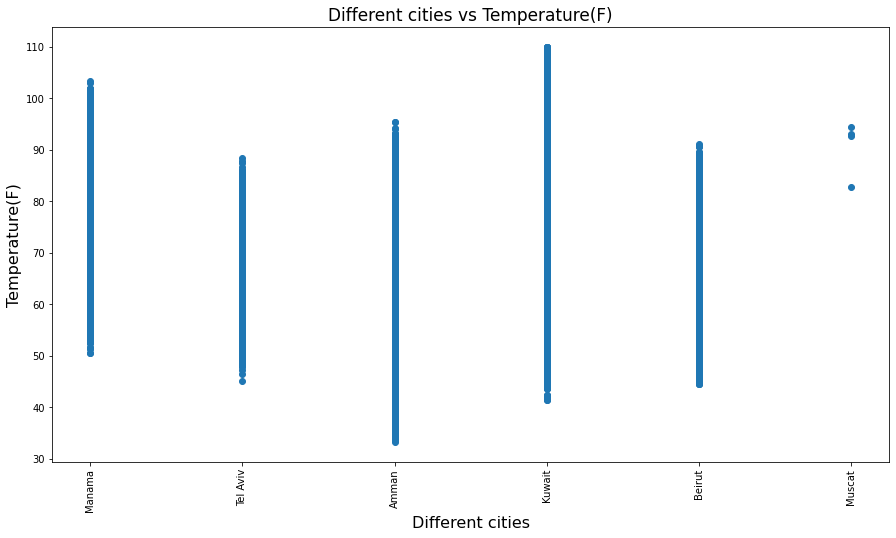

None


In [21]:
names = ['Africa','Asia','Austrailia','Europe','Middle East']
for i in range(len(all_regions)):
    
    print(names[i])
    current = all_regions[i]
    plt.figure(figsize=(15,8))
    plt.scatter(current['City'], current['AvgTemperature'])
    plt.title('Different cities vs Temperature(F)', fontsize=17)
    plt.xlabel('Different cities', fontsize=16)
    plt.ylabel('Temperature(F)', fontsize=16)
    plt.xticks(rotation=90)
    print(plt.show())

<font color = 'green'>We can see that temperature varies a lot in different cities of a region.We can also see in which cities temperature can increase a lot and can also decrase a lot.</font>

<font color = 'green'>Temperature difference in different month.</font>

Africa


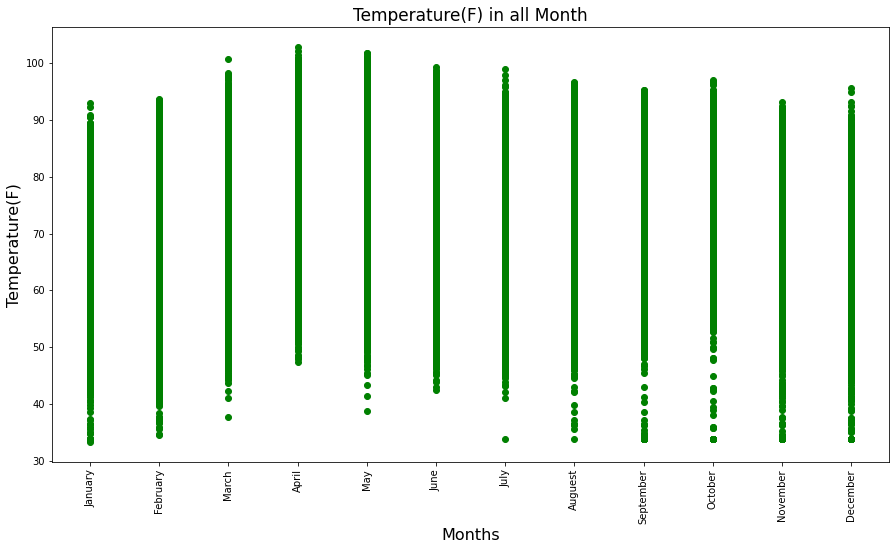

None
Asia


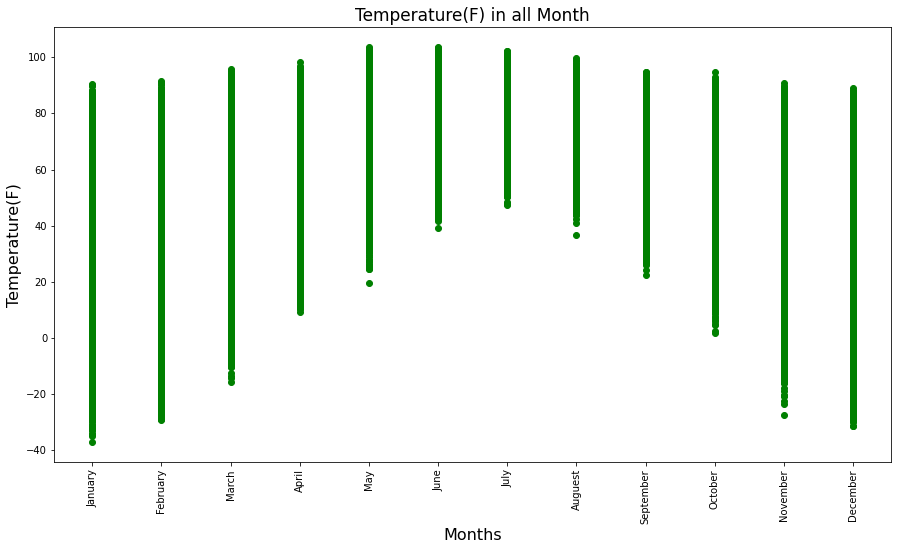

None
Austrailia


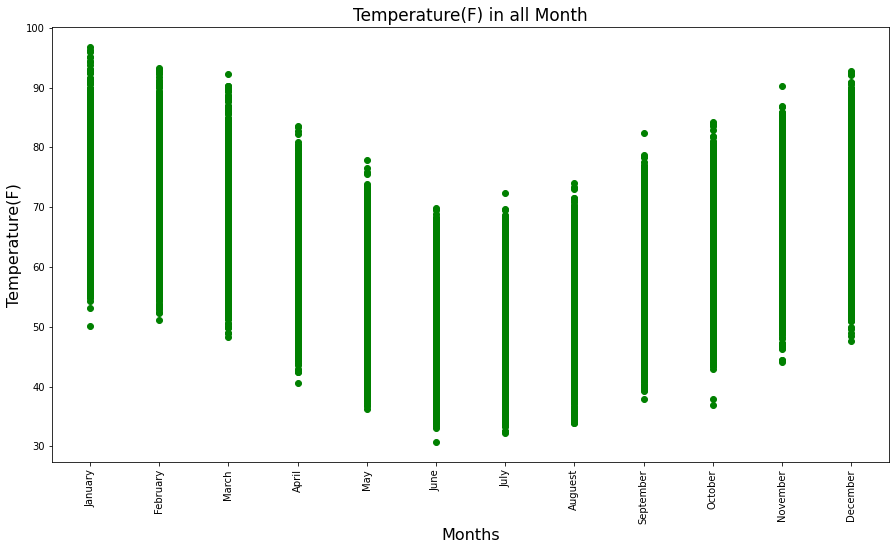

None
Europe


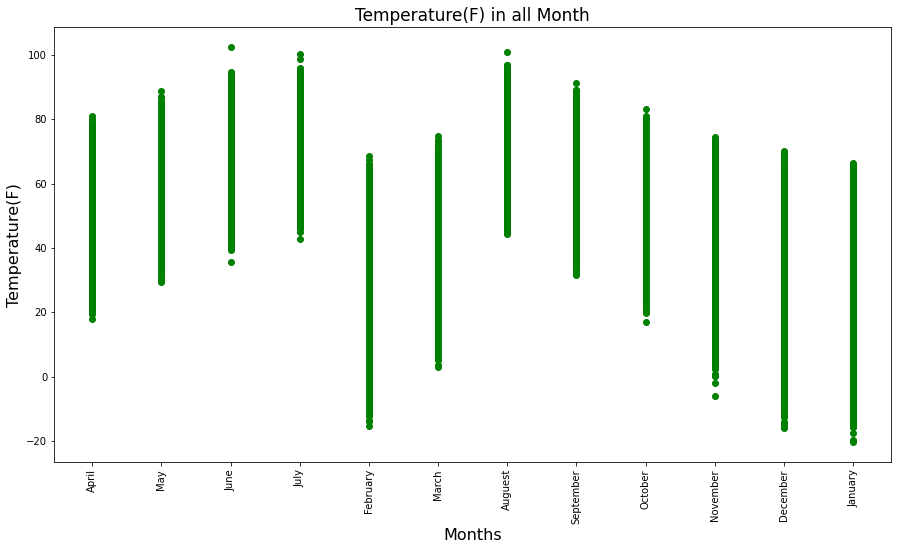

None
Middle East


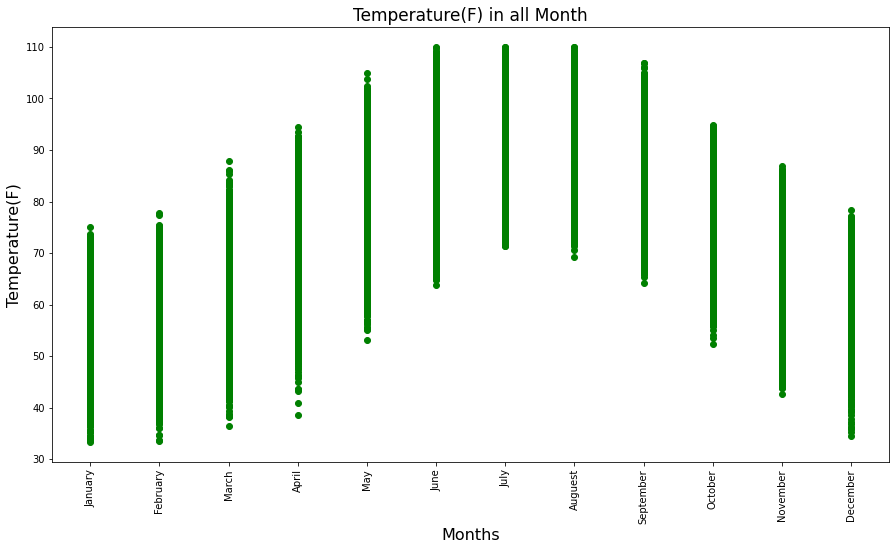

None


In [22]:
for i in range(len(all_regions)):
    print(names[i])
    current = all_regions[i]
    plt.figure(figsize=(15,8))
    plt.scatter(current['Month'], current['AvgTemperature'],c = 'green')
    plt.title('Temperature(F) in all Month', fontsize=17)
    plt.xlabel('Months', fontsize=16)
    plt.ylabel('Temperature(F)', fontsize=16)
    plt.xticks(rotation=90)
    print(plt.show())


<font color = 'green'>From the graph we can understand in which month temperature normally increses and decreases for different regions.</font>

<font color = 'green'>Temperature difference in different year.</font>

Africa


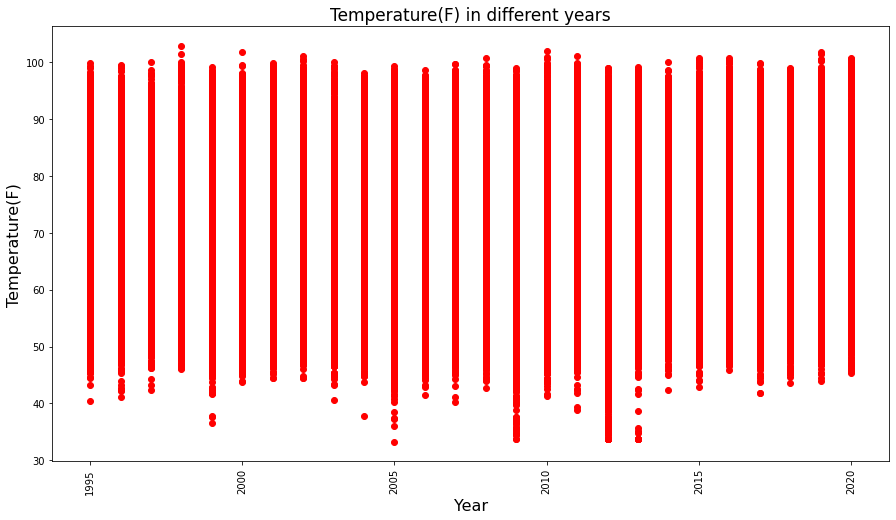

None
Asia


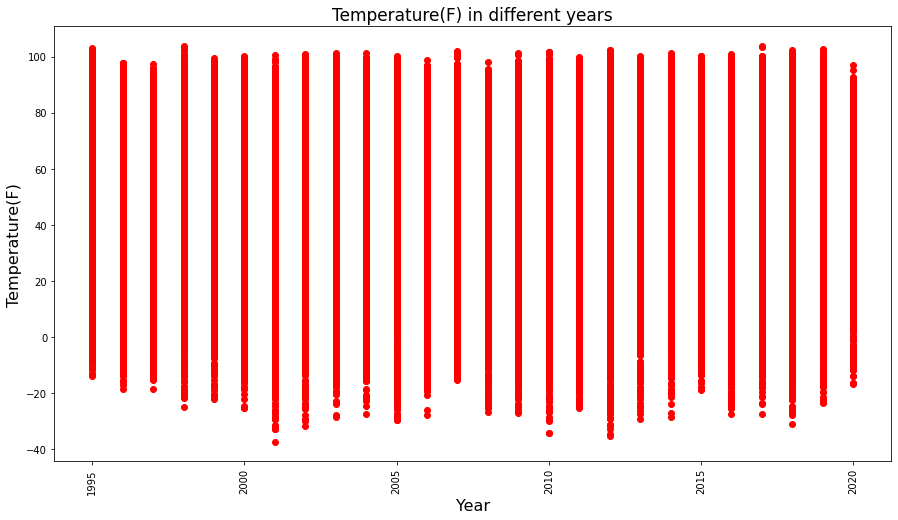

None
Austrailia


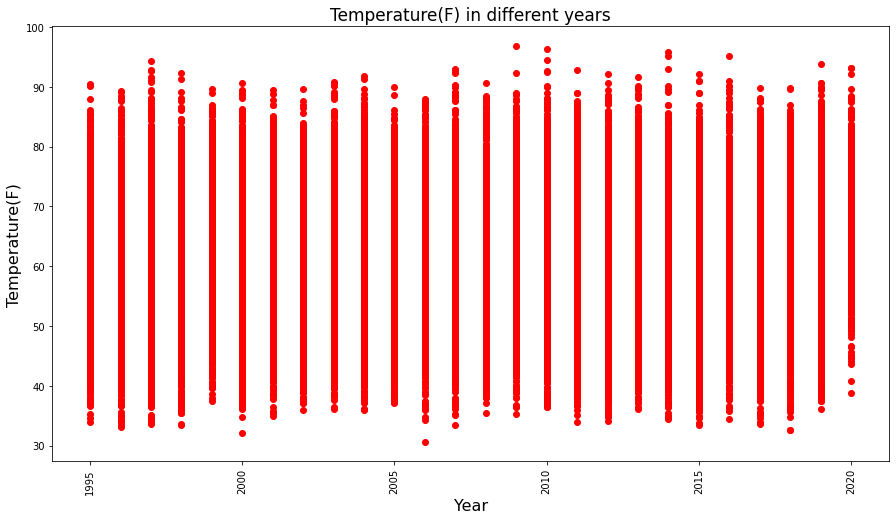

None
Europe


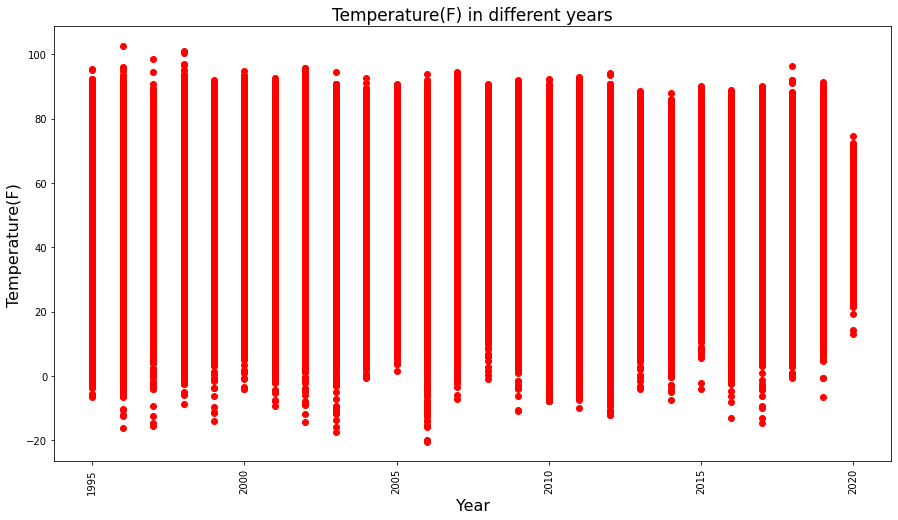

None
Middle East


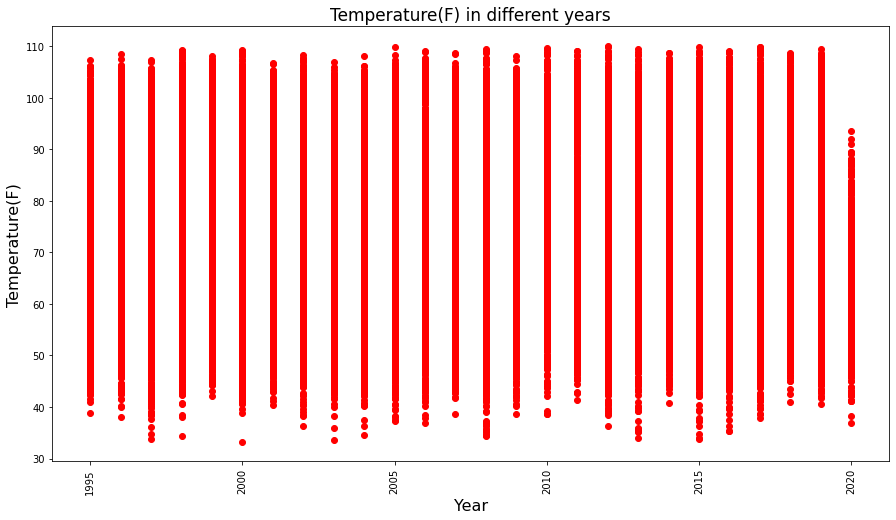

None


In [23]:
for i in range(len(all_regions)):
    print(names[i])
    current = all_regions[i]
    plt.figure(figsize=(15,8))
    plt.scatter(current['Year'], current['AvgTemperature'],c = 'red')
    plt.title('Temperature(F) in different years', fontsize=17)
    plt.xlabel('Year', fontsize=16)
    plt.ylabel('Temperature(F)', fontsize=16)
    plt.xticks(rotation=90)
    print(plt.show())

<font color = 'green'>We can see that from 1995 to 2020 temperature in different regions sometimes increses and sometimes decreses.</font>

<font color = 'green'>For better understanding we will take 2020's temperature data and 1995's temperature data and compare them to know where the temperature increased or decreased.</font>

In [24]:
temperature_2020 = dataset.loc[dataset.Year.isin(['2020'])]
temperature_2020 = temperature_2020.loc[:,['Region','Country','City', 'Month','Day','Year','AvgTemperature']]
temperature_2020 = temperature_2020[temperature_2020['AvgTemperature'] != -99.0] 


temperature_1995 = dataset.loc[dataset.Year.isin(['1995'])]
temperature_1995 = temperature_1995.loc[:,['Region','Country','City', 'Month','Day','Year','AvgTemperature']]
temperature_1995 = temperature_1995[temperature_1995['AvgTemperature'] != -99.0] 


temp_difference = pd.merge(temperature_2020, temperature_1995, on=['Region','Country', 'City', 'Month', 'Day'], how='inner')
temp_difference['Temperature_Difference']=temp_difference['AvgTemperature_x']-temp_difference['AvgTemperature_y']

#finding in which countries tempreture actually increased and decreased using mean of temperatures

temp_difference = temp_difference.groupby(['Country', 'City','AvgTemperature_x','AvgTemperature_y']).Temperature_Difference.mean()
temp_difference = temp_difference.sort_values(ascending=False)
temp_difference = temp_difference.to_frame()

<font color = 'green'>Printing top 20 countries where temperature increased a lot from 1995 to 2020.</font>
        

Text(0, 0.5, 'Increase in Temperature(F)')

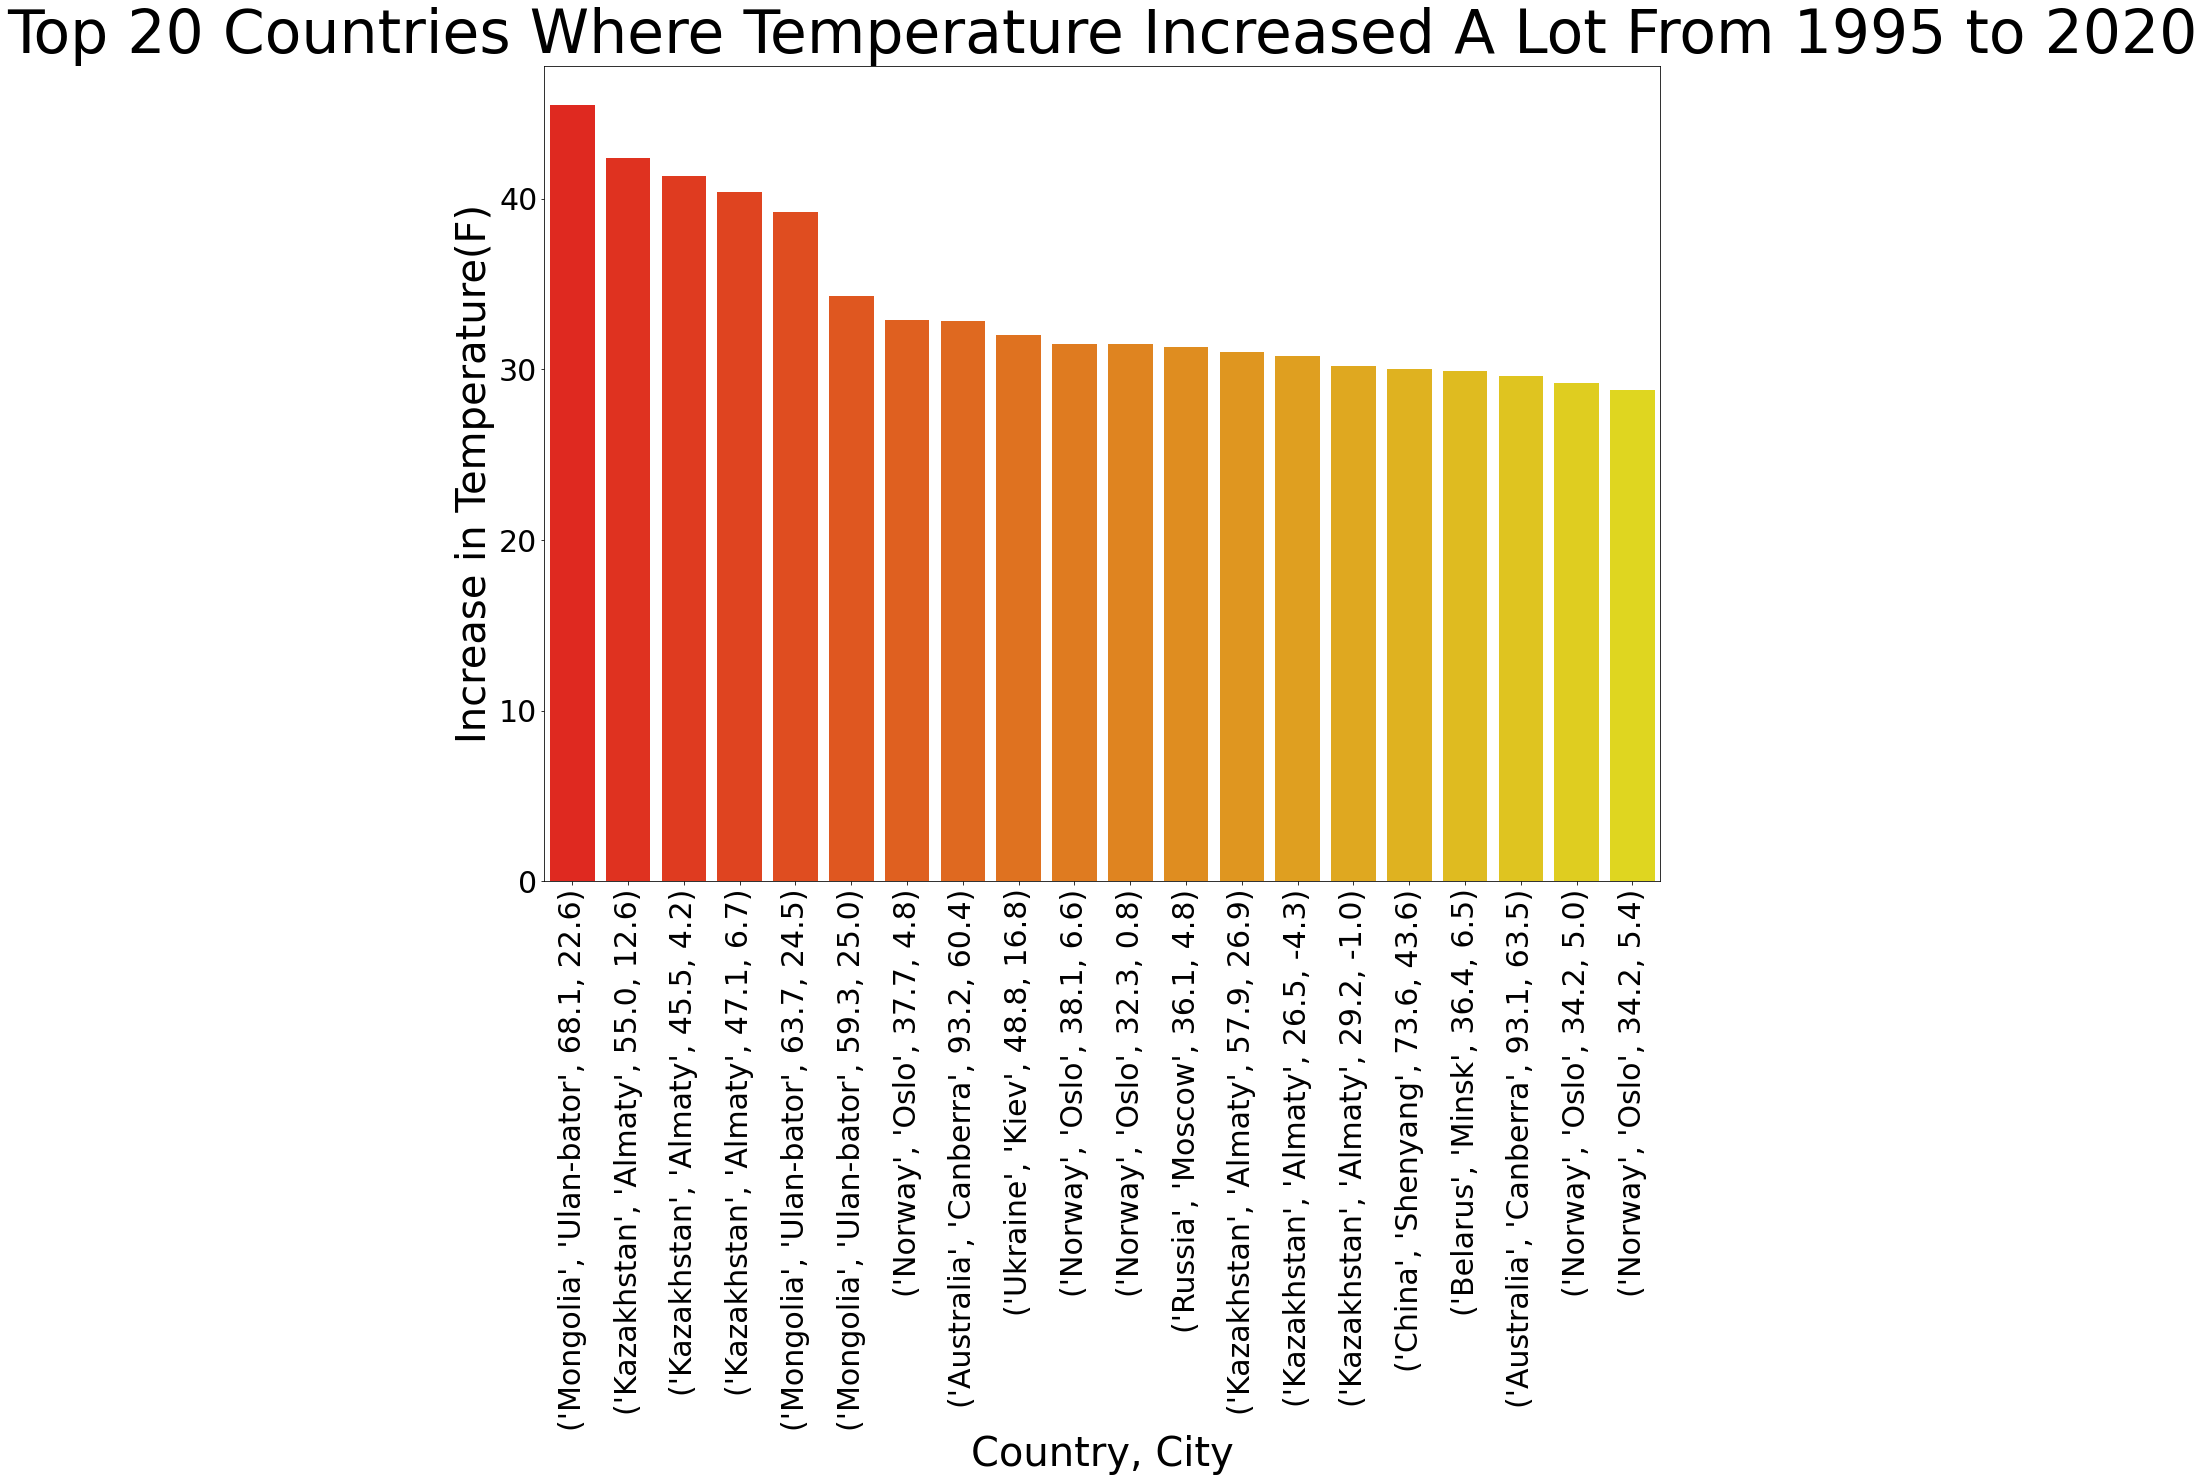

In [25]:
plt.figure(figsize=(20,15))
plt.title("Top 20 Countries Where Temperature Increased A Lot From 1995 to 2020", fontsize=60)
plt.tick_params(labelsize=30)
plt.xlabel("Country, City", fontsize=40)
sns.barplot(x=temp_difference.head(20).index, y=temp_difference.head(20)['Temperature_Difference'],palette='autumn')
plt.xticks(rotation=90)
plt.ylabel("Increase in Temperature(F)", fontsize=40)

<font color = 'green'>Printing top 20 countries where temperature decreased a lot from 1995 to 2020.</font>

Text(0, 0.5, 'Decrease in Temperature(F)')

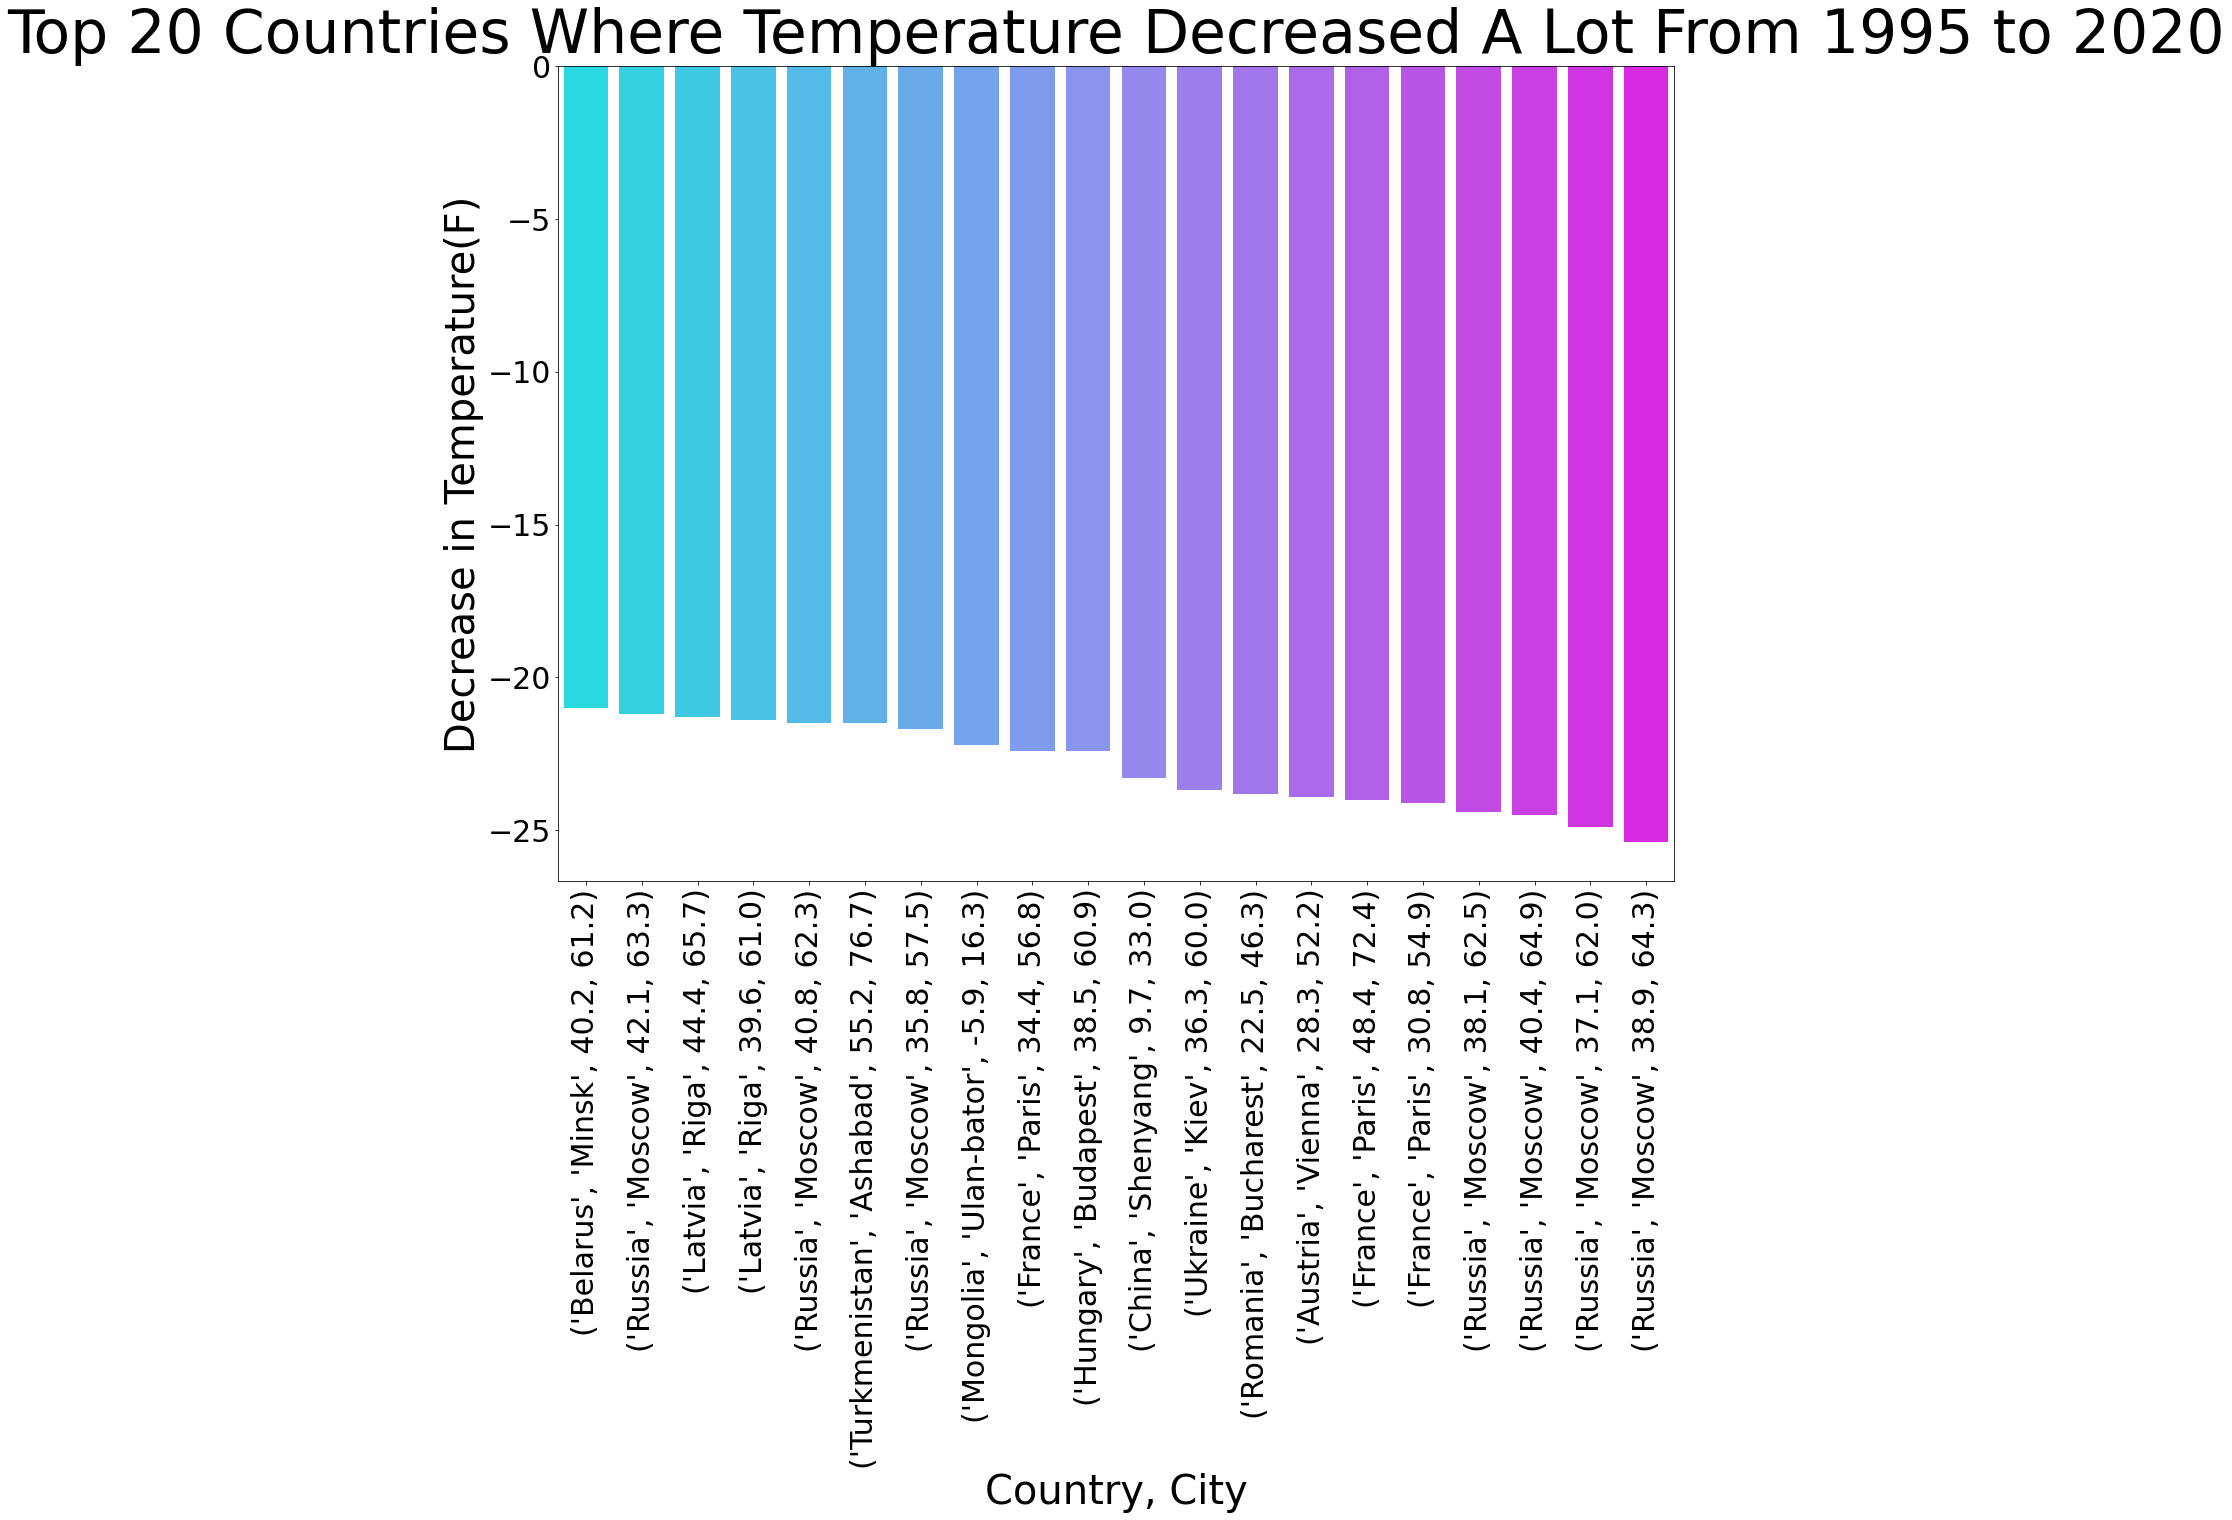

In [26]:
plt.figure(figsize=(20,15))
plt.title("Top 20 Countries Where Temperature Decreased A Lot From 1995 to 2020", fontsize=60)
plt.tick_params(labelsize=30)
plt.xlabel("Country, City", fontsize=40)
sns.barplot(x=temp_difference.tail(20).index, y=temp_difference.tail(20)['Temperature_Difference'],palette='cool')
plt.xticks(rotation=90)
plt.ylabel("Decrease in Temperature(F)", fontsize=40)

<font color = 'green'>From the above 2 grpahs we can clearly see how global warming or temperature is increasing and affecting the world.We can also see which country are affected heavily due to global warming.</font> 